
# Hierarchical Clustering and Cluster Evaluation

Let us consider presidential elections of years past and do some exploratory grouping of states based on the 2008,2012, and 2016 presidential elections results.  The data we have is from the [The American Presidency Project](https://www.presidency.ucsb.edu/statistics/elections) and split into two files:

  - `votes_by_state.csv` => has the raw number of ballots cast for each of the top presidential candidates from 2008-2012 by US State (and the District of Columbia)
  - `republican_percentage_by_state.csv` => has the percentage of votes that were for the Republican candidate for 2008, 2012, and 2016 by US State (and the District of Columbia)
  
Our job is to group together states using different hierarchical agglomerative methodologies and compare the results.

We will use scipy to plot the hierarchical clusters formed from the raw vote count (`votes_by_state.csv`) using three different proximity measures ward, min and max.

# import proper packages and dataset

In [ ]:
# Do not modify import block, all necessary imports are included

# Our regular libraries
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# This is for our hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

# For our k-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

In [ ]:
# Load the data, save off the state names into another series and just leave the attributes.
df = pd.read_csv('https://gist.githubusercontent.com/TieJean/a63b4d51246aec6b73bb75944dd69ead/raw/292d338340efa19b8b47958ee4cfcca5e3d8e09c/votes_by_state.csv')

# please save the 'State' column into dataframe named as 'state'
states = df['State']

# please save the other columns ( exclude 'State') into dataframe named as 'attribute'
attribute = df.drop(columns=['State'])


## Q1 - Using Different Proximity Functions

There is another scientific python library we haven't used much, SciPy, which has [library for hierarchical clustering](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) and for [plotting dendrograms](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram).

Use these libraries to plot the hierarchical clusters formed from the raw vote count (`votes_by_state.csv`) using three different proximity measures:
  - Ward
  - Min
  - Max
  
The x-axis of the dendrogram should be labeled using the state name (and not the index of the state in the data frame).  The title should reflect what proximity measure you used to create the clusters.  In this use case only the number of votes cast are attributes, and the State names are the labels on that row of data.

Note, to make the plot legible you will have to change the plot size.  I found `figsize=(25,8)` worked well for me, but your mileage may vary depending on your setup.

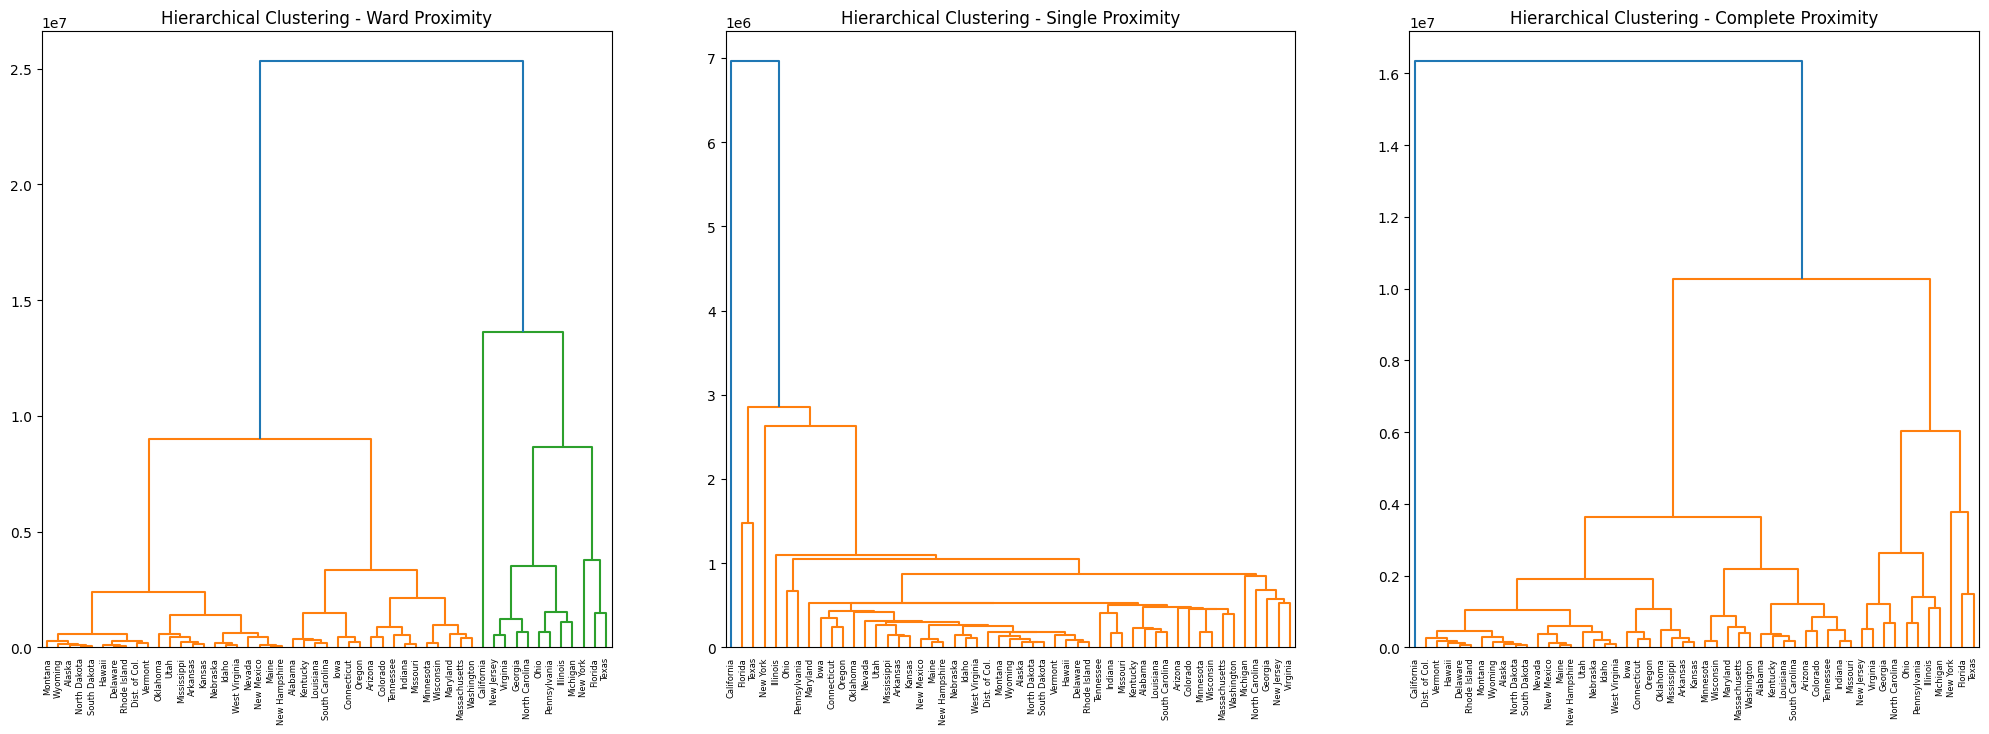

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Perform hierarchical clustering with different proximity measures
methods = ['ward', 'single', 'complete']
fig, axes = plt.subplots(1, 3, figsize=(25, 8))

for method, ax in zip(methods, axes):
    Z = linkage(attribute, method)
    dendrogram(Z, labels=states.values, ax=ax)
    ax.set_title(f'Hierarchical Clustering - {method.capitalize()} Proximity')

plt.show()


## Q2 - Using Different Proximity Functions (part 2)

What is happening?  Even if you aren't a big politics wonk, you might find it strange that New York is closer to Texas than it is to California in all of those graphs!! You may think to yourself, "Self, how could this be?" You also might notice that Montana, Wyoming, and Alaska all tend to cluster together in all of these scenarios.

At this point, your data science brain might be noticing that the _population_ of that state seems to be more important than which party _won_ the state.  You decide to engineer the data such that you reduce the dimensions down from 7 attributes, to 3 attributes, where each column is the _percentage_ of votes that were cast to the Republican candidate, and a 4th attribute indicating the range of percentages across the 3 elections.  I went ahead and did this for you, and created the file `republican_percentage_by_state.csv`.

Plot the hierarchical clusters formed from percentage of ballots cast by Republicans (`republican_percentage_by_state.csv`) using three different proximity measures:
  - Ward
  - Min
  - Max
  
The x-axis of the dendrogram should be labeled using the state name (and not the index of the state in the data frame).  The title should reflect what proximity measure you used to create the clusters.  In this use case only the number of votes cast are attributes, and the State names are the labels on that row of data.

Note, to make the plot legible you will have to change the plot size.  I found `figsize=(12,8)` worked well for me, but your mileage may vary depending on your setup.

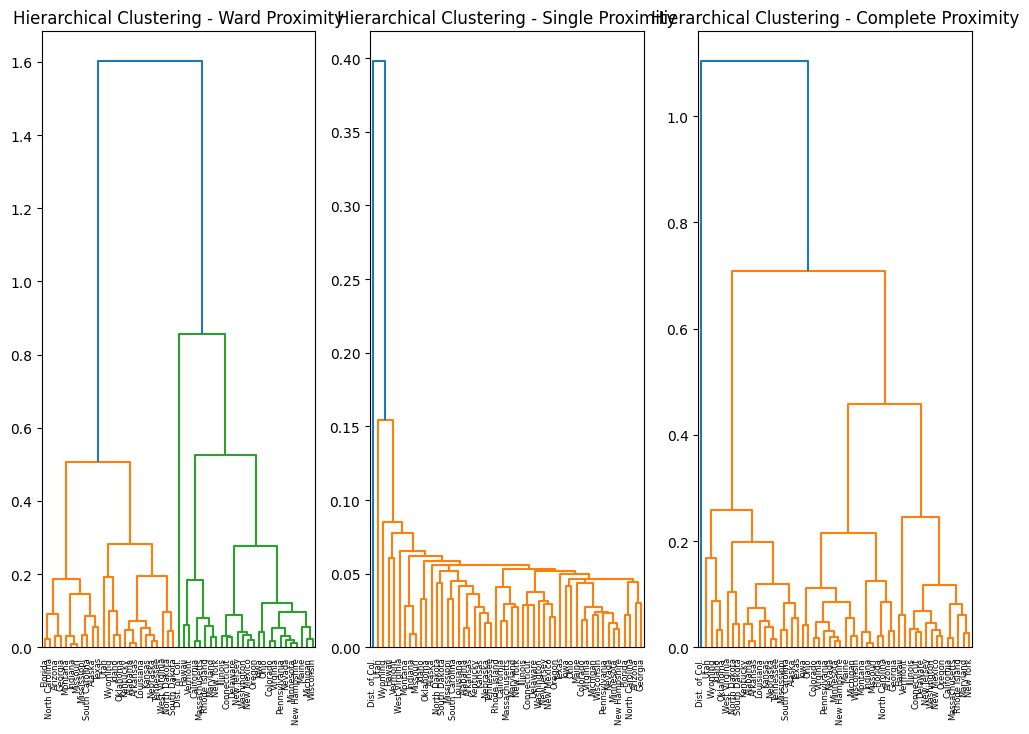

In [ ]:
# Load the data for part 2
df_X = pd.read_csv('https://gist.githubusercontent.com/TieJean/74d13de3875643140d620f0664e1c933/raw/294658528271118725d4b10779cbb430597cf07d/republican_percentage_by_state.csv')

states = df_X['State']

attribute_X = df_X.drop(columns=['State'])

methods = ['ward', 'single', 'complete']
fig, axes = plt.subplots(1, 3, figsize=(12, 8))

for method, ax in zip(methods, axes):
    Z = linkage(attribute_X, method)
    dendrogram(Z, labels=states.values, ax=ax)
    ax.set_title(f'Hierarchical Clustering - {method.capitalize()} Proximity')

plt.show()


Q3 Using the data from question 2 (creating hierarchical clusters on the percentage of Republican votes), calculate the Cophenetic Correlation Coefficient for each of the three methods.  Display the results, and add a markdown cell explaining how to interpret this metric. You may use the scipy [cophenet function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.cophenet.html) with the output from  [pdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html) function as the `Y` parameter.

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet

Y = pdist(attribute_X)

cpcc_ward, cp_ward_mat = cophenet(linkage(attribute_X, 'ward'), Y)
cpcc_single, cp_single_mat = cophenet(linkage(attribute_X, 'single'), Y)
cpcc_complete, cp_complete_mat = cophenet(linkage(attribute_X, 'complete'), Y)

print(f"Cophenetic Correlation Coefficient (Ward): {cpcc_ward}")
print(f"Cophenetic Correlation Coefficient (Single): {cpcc_single}")
print(f"Cophenetic Correlation Coefficient (Complete): {cpcc_complete}")


Cophenetic Correlation Coefficient (Ward): 0.5883071696030502
Cophenetic Correlation Coefficient (Single): 0.695463585768092
Cophenetic Correlation Coefficient (Complete): 0.7406937703705782


Start from the following questions, we will dig a little deeper into the implementation details of hierarchical clustering.

Q4. X1 = [[1,1], [3,2], [3,7], [4,8],[1,4]] for cluster X1 , X2 = [[9,1], [7,2], [9,7], [8,3]] for cluster X2, please implement the distance calculation between X1 and X2 based on min(Single) Linkage

In [ ]:
X1 = np.array([[1,1], [3,2], [3,7], [4,8],[1,4]])
X2 = np.array([[9,1], [7,2], [9,7], [8,3]])


In [ ]:
def min_linkage(X1, X2):
    distance = np.inf
    for point1 in X1:
        for point2 in X2:
            current_distance = np.sqrt(np.sum((point1 - point2) ** 2))

            if current_distance < distance:
                distance = current_distance

    return distance

print(min_linkage(X1, X2))

4.0


Q5. X1 = [[1,1], [3,2], [3,7], [4,8],[1,4]] for cluster X1 , X2 = [[9,1], [7,2], [9,7], [8,3]] for cluster X2, please implement the distance calculation between X1 and X2 based on max(complete) Linkage

In [ ]:
X1 = np.array([[1,1], [3,2], [3,7], [4,8],[1,4]])
X2 = np.array([[9,1], [7,2], [9,7], [8,3]])

In [ ]:
def max_linkage(X1, X2):
    distance = -np.inf

    for point1 in X1:
        for point2 in X2:
            current_distance = np.sqrt(np.sum((point1 - point2) ** 2))
            if current_distance > distance:
                distance = current_distance

    return distance

print(max_linkage(X1, X2))


10.0


Q6. X1 = [[1,1], [3,2], [3,7], [4,8],[1,4]] for cluster X1 , X2 = [[9,1], [7,2], [9,7], [8,3]] for cluster X2, please implement the distance calculation between X1 and X2 based on centroid Linkage

In [ ]:
X1 = np.array([[1,1], [3,2], [3,7], [4,8],[1,4]])
X2 = np.array([[9,1], [7,2], [9,7], [8,3]])

In [ ]:
def centroid_linkage(X1, X2):
    # Calculate the centroid of each cluster
    centroid_X1 = np.mean(X1, axis=0)
    centroid_X2 = np.mean(X2, axis=0)

    # Calculate Euclidean distance between the centroids
    distance = np.sqrt(np.sum((centroid_X1 - centroid_X2) ** 2))

    return distance

print(centroid_linkage(X1, X2))


5.961962764056817


Q7. X1 = [[1,1], [3,2], [3,7], [4,8],[1,4]] for cluster X1 , X2 = [[9,1], [7,2], [9,7], [8,3]] for cluster X2, please implement the distance calculation between X1 and X2 based on Average Linkage

In [ ]:
X1 = np.array([[1,1], [3,2], [3,7], [4,8],[1,4]])
X2 = np.array([[9,1], [7,2], [9,7], [8,3]])

In [ ]:
def centroid_linkage(X1, X2):
    # Calculate the centroid of each cluster
    centroid_X1 = np.mean(X1, axis=0)
    centroid_X2 = np.mean(X2, axis=0)

    # Calculate Euclidean distance between the centroids
    distance = np.sqrt(np.sum((centroid_X1 - centroid_X2) ** 2))

    return distance

print(centroid_linkage(X1, X2))

5.961962764056817


Q8. X1 = [[1,1], [3,2], [3,7], [4,8],[1,4]] for cluster X1 , X2 = [[9,1], [7,2], [9,7], [8,3]] for cluster X2, please implement the distance calculation between X1 and X2 based on Ward Linkage

In [ ]:
X1 = np.array([[1,1], [3,2], [3,7], [4,8],[1,4]])
X2 = np.array([[9,1], [7,2], [9,7], [8,3]])

In [ ]:
def ward_linkage(X1, X2):
    n1, _ = X1.shape
    n2, _ = X2.shape

    # Calculate the centroids of clusters X1 and X2
    c1 = np.mean(X1, axis=0)
    c2 = np.mean(X2, axis=0)

    # Compute the Ward distance
    distance = (n1 * n2 * np.sum((c1 - c2)**2)) / (n1 + n2)

    return distance

print(ward_linkage(X1, X2))

78.98888888888888


### **DBSCAN in Python**

Start from the following questions, we will dig a little deeper into the implementation details of hierarchical clustering.


We will use the DBSCAN implementation from the `sklearn` library.

* Let's start by generating some synthetic data and then apply DBSCAN to it.

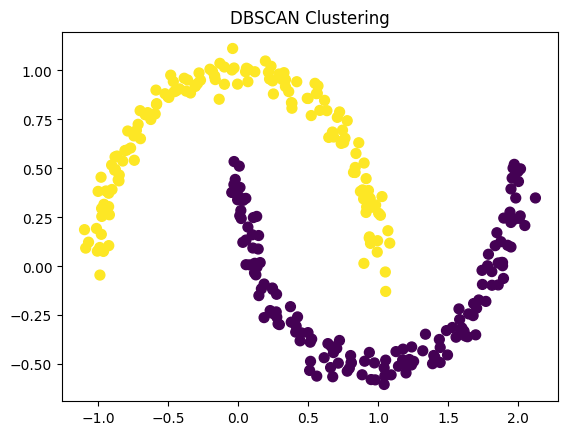

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate synthetic data
X, _ = make_moons(n_samples=300, noise=0.05, random_state=0)

# Apply DBSCAN
db = DBSCAN(eps=0.3, min_samples=5)
labels = db.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.show()

Q9.
Using the [pseudo-code](https://en.wikipedia.org/wiki/DBSCAN#Algorithm) on wikipedia, implement RangeQuery. And print out the N set(represented by indices of points in data frame) when Q is the 0-th point in X([ 0.71541261, -0.49408918]) and 5-th point in X([ 1.2397133 , -0.4114107 ])

```
RangeQuery(DB, distFunc, Q, eps) {
    Neighbors N := empty list
    for each point P in database DB {                      /* Scan all points in the database */
        if distFunc(Q, P) ≤ eps then {                     /* Compute distance and check epsilon */
            N := N ∪ {P}                                   /* Add to result */
        }
    }
    return N
}
```

The "DB" parameter is a data frame, `df_data` containing all of the points in our data set, the "distFunc" is set as Euclidean distance thus should not be passed in, the point "Q", is represented by the index of the data frame, `q_index`, where `df_data.iloc[q_index]` is the actual point, and `eps` is a floating point value that indicates the radius from the point "Q" to search for neighbors.  The function will return the slice of `df_data` of all points within `eps` distance of "Q" (including "Q").  The indices on the slice should be preserved (do not reset_index).  

In [ ]:
def range_query(df_data, q_index, eps):
    N = []
    Q = df_data.iloc[q_index].values

    for P_idx, P_row in df_data.iterrows():
        P = P_row.values
        if np.linalg.norm(Q - P) <= eps:
            N.append(P_idx)

    return df_data.loc[N]



In [ ]:
print()
print()

Q10. Using the above synthetic dataset X, compare the results of DBSCAN with hierarchical clustering algorithm. What are the key differences you notice?



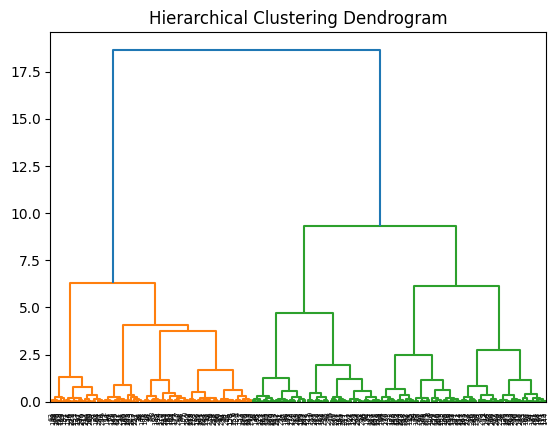

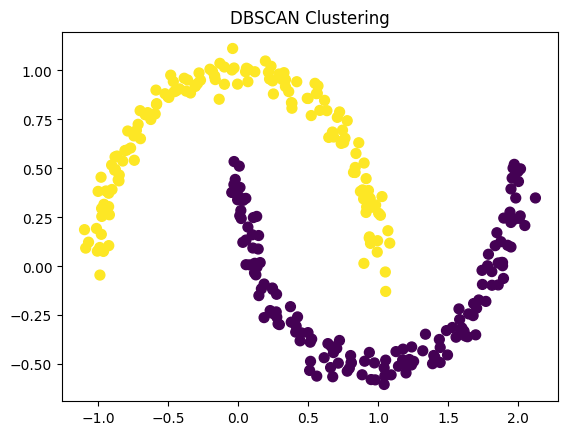

In [ ]:
X, _ = make_moons(n_samples=300, noise=0.05, random_state=0)
db = DBSCAN(eps=0.3, min_samples=5)
db_labels = db.fit_predict(X)

Z = linkage(X, method='ward')
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=db_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.show()

"""Cluster Shapes:DBSCAN is capable of identifying clusters with arbitrary shapes and sizes based on density.
Hierarchical clustering, depending on the linkage method used, may form clusters with specific shapes, and it may struggle with identifying clusters of complex shapes.
DBSCAN does not require specifying the number of clusters in advance, and it can find clusters of varying densities.
Hierarchical clustering may require specifying the number of clusters or using additional methods to determine the optimal number. The dendrogram provides a visual representation of the hierarchy.
 DBSCAN can label data points as noise/outliers if they do not belong to any cluster based on density.
Hierarchical clustering assigns all data points to clusters, potentially including noise points in clusters.
The dendrogram from hierarchical clustering provides a visual representation of the hierarchy, illustrating the merging and splitting of clusters.
DBSCAN output is typically visualized by scatter plots, and the clusters may not have a hierarchical structure. DBSCAN can be more efficient for large datasets with varying densities, as it focuses on local density estimation.
Hierarchical clustering can be computationally expensive, especially for large datasets, as it involves the computation of pairwise distances and the construction of a hierarchy. Hierarchical clustering provides a clear hierarchical structure, making it easier to interpret relationships between clusters.
DBSCAN's clusters may not have a hierarchical relationship, and interpretation may rely more on density-based properties."""